In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
#gaussian elimination 
def GE(A,S):
    As = np.diag(A)
    J= len(As)
    Bs = -1* np.diag(A,1)
    
    Ds = np.zeros(J)
    Ds[0] = As[0]
    T= np.zeros(J)
    T[0] = S[0]

    for i in range(1,J):
        Ds[i] = As[i] - Bs[i-1]**2/Ds[i-1]
        T[i] = S[i] + Bs[i-1] * T[i-1] / Ds[i-1]

    flux_GE =  np.zeros(J)
    flux_GE[J-1] = T[J-1] / Ds[J-1]

    for i in range(J-1):
        flux_GE[J-i-2] = (T[J-i-2] + Bs[J-i-2] * flux_GE[J-i-1]) / Ds[J-i-2] 
    return flux_GE

In [36]:
#Jacobi iteration method
def Jac(A,S):
    As = np.diag(A)
    J= len(As)
    Bs = -1* np.diag(A,1)

    Flux_new = np.ones(J)
    Flux_old = np.zeros(J)
    temp= max(abs(Flux_new-Flux_old))

    while(temp > 10**-5):
    
        for i in range(J):
            if(i==0):
                Flux_new[i] = S[i]/As[i] + Bs[i] / As[i] * (Flux_old[i+1])
            if(i==J-1):
                Flux_new[i] = S[i]/As[i] + Bs[i-1] / As[i] * (Flux_old[i-1])
            if(i!=0 and i!= J-1):
                Flux_new[i] = S[i]/As[i] + Bs[i-1]/As[i] * (Flux_old[i-1]) + Bs[i]/As[i] * (Flux_old[i+1])
        
    
        err = Flux_new-Flux_old
    
        temp= max(abs(err))
    
        Flux_old = Flux_new.copy()
    Flux_Jac = Flux_new.copy()

    return Flux_Jac

In [37]:
#Gauss-Siedel iteration method
def GS(A,S):
    As = np.diag(A)
    J= len(As)
    Bs = -1* np.diag(A,1)

    Flux_new = np.ones(J)
    Flux_old = np.zeros(J)
    temp= max(abs(Flux_new-Flux_old))

    while(temp > 10**-5):
    
        for i in range(J):
            if(i==0):
                Flux_new[i] = S[i]/As[i] + Bs[i] / As[i] * (Flux_old[i+1])
            if(i==J-1):
                Flux_new[i] = S[i]/As[i] + Bs[i-1] / As[i] * (Flux_new[i-1])
            if(i!=0 and i!= J-1):
                Flux_new[i] = S[i]/As[i] + Bs[i-1]/As[i] * (Flux_new[i-1]) + Bs[i]/As[i] * (Flux_old[i+1])
        
    
        err = Flux_new-Flux_old
    
        temp= max(abs(err))
    
        Flux_old = Flux_new.copy()

    Flux_GS = Flux_new.copy()
    return Flux_GS

In [38]:
#given data:

X= 15
h = 0.5
sigma_t = 1
sigma_a = 0.005
sigma_tr = sigma_t
Q = 0
J_0 = 1
J_X = 1

D = 1/(3*sigma_tr)


C:\Users\mdfah\AppData\Local\Temp\ipykernel_7232\855718226.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  T[0] = S[0]
C:\Users\mdfah\AppData\Local\Temp\ipykernel_7232\855718226.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  T[i] = S[i] + Bs[i-1] * T[i-1] / Ds[i-1]
C:\Users\mdfah\AppData\Local\Temp\ipykernel_7232\625047359.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Flux_new[i] = S[i]/As[i] + Bs[i] / As[i] * (Flux_old[i+1])
C:\Users\mdfah\AppDat

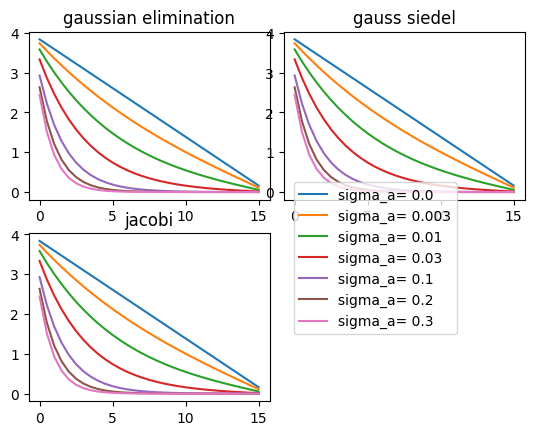

In [39]:
x = np.transpose(np.arange(0, 15+h, h))
k =0
result_GE= np.empty((len(x), 7))
result_GS= np.empty((len(x), 7))
result_Jac= np.empty((len(x), 7))

plot1 = plt.subplot2grid((2, 6), (0, 0), colspan=3, rowspan= 1) 
plot2 = plt.subplot2grid((2, 6), (0, 3), colspan=3, rowspan= 1) 
plot3 = plt.subplot2grid((2, 6), (1, 0), colspan=3, rowspan= 1) 




#cell edged:
for sigma_a in [0.0,  0.003, 0.01, 0.03, 0.1, 0.2, 0.3]:
    sigma_tr = sigma_t
    D = 1/(3*sigma_tr)
    arr_dim = len(x)
    A = np.zeros((arr_dim,arr_dim))
    S = np.zeros((arr_dim,1))

    for i in range(arr_dim):
        if(i==0):
            A[i,i] = D/h + 1/2 + 1/3 * sigma_a*h
            A[i,i+1] = -(D/h - 1/6 *sigma_a *h)
            S[i,0] = Q*h/2  + 2*J_0
    
        if (i!=0 and i != arr_dim-1):
            A[i,i] = 2*D/h+2/3*sigma_a*h
            A[i,i+1] = -(D/h - 1/6 *sigma_a *h)
            A[i,i-1] = -(D/h - 1/6 *sigma_a *h)
            S[i,0] = Q*h

        if(i== arr_dim-1):
            A[i,i] = D/h + 1/3 * sigma_a*h + 1/2
            A[i,i-1] = -(D/h - 1/6 *sigma_a *h)
            S[i,0] = 1/2*Q*h
    result_GE[:,k] = GE(A,S)
    plot1.plot(x, result_GE[:,k], label='sigma_a= '+str(sigma_a) )
    plot1.set_title('gaussian elimination')

    result_GS[:,k] = GS(A,S)
    plot2.plot(x, result_GS[:,k], label='sigma_a= '+str(sigma_a))
    plot2.set_title('gauss siedel')
    
    result_Jac[:,k] = Jac(A,S)
    plot3.plot(x, result_Jac[:,k], label='sigma_a= '+str(sigma_a) )
    plot3.set_title('jacobi')
    k = k+1
plt.legend(loc=(1.1,0.4))
plt.tight_layout() 
plt.show()



In [40]:
result_GE[6:,0]

array([3.10204082, 2.97959184, 2.85714286, 2.73469388, 2.6122449 ,
       2.48979592, 2.36734694, 2.24489796, 2.12244898, 2.        ,
       1.87755102, 1.75510204, 1.63265306, 1.51020408, 1.3877551 ,
       1.26530612, 1.14285714, 1.02040816, 0.89795918, 0.7755102 ,
       0.65306122, 0.53061224, 0.40816327, 0.28571429, 0.16326531])